In [33]:
from sklearn import datasets
import pandas as pd
import numpy as np

In [3]:
breast_cancer = datasets.load_breast_cancer()

In [11]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [13]:
df = pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)

In [14]:
df['target'] = breast_cancer.target

In [15]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,0
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,0
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,0
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,0
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,0
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,0
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,0
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,0
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,0
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,0


In [16]:
df.shape

(569, 31)

In [17]:
from sklearn.model_selection import train_test_split


In [20]:
X = df.iloc[:,:-1]

In [22]:
y = df['target']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn = KNeighborsClassifier(n_neighbors=1)

In [28]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [29]:
print("accuracy: ", knn.score(X_test,y_test))

accuracy:  0.9440559440559441


In [30]:
y_pred = knn.predict(X_test)

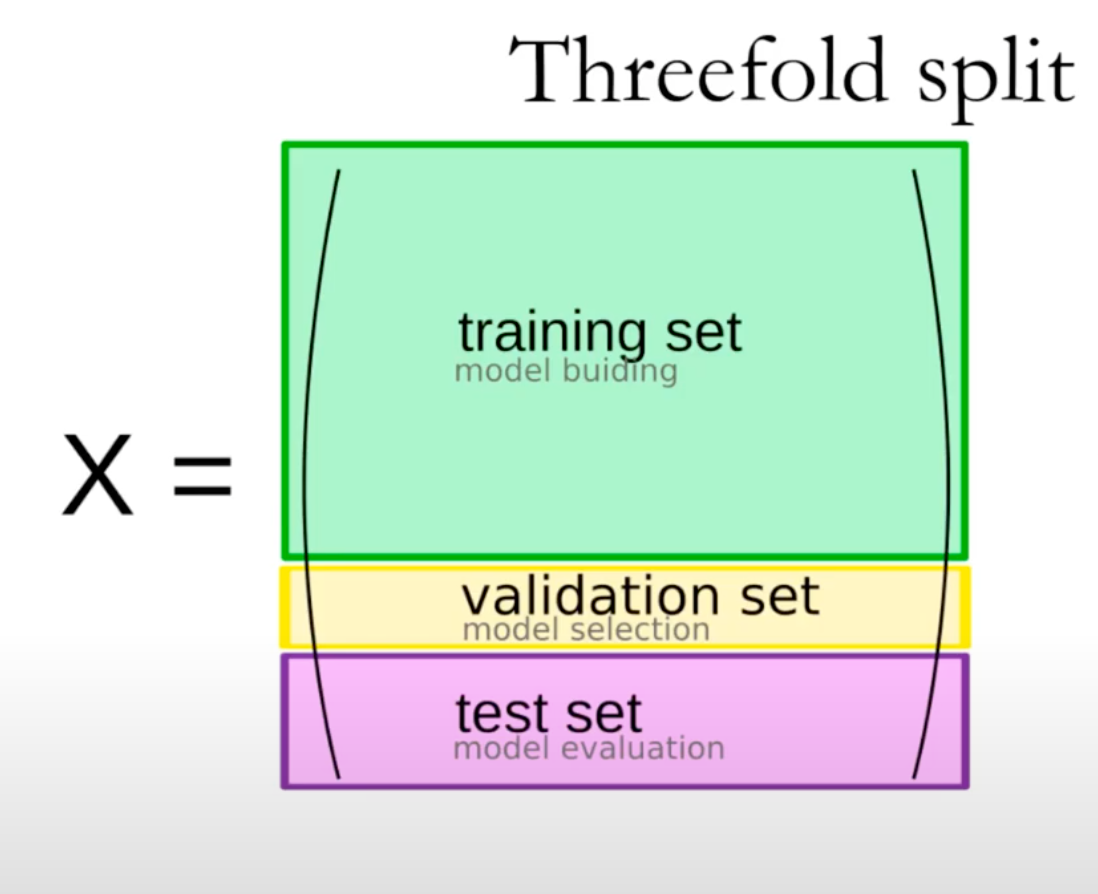

# Threefold split for hyper-parameter

In [31]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X,y)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval)

In [35]:
val_scores = []
neighbors = np.arange(1,15,2)
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    val_scores.append(knn.score(X_val,y_val))
print("best validation score: {:.3f}".format(np.max(val_scores)))
best_n_neighbors = neighbors[np.argmax(val_scores)]
print("best_n_neighbors:", best_n_neighbors)

knn = KNeighborsClassifier(n_neighbors= best_n_neighbors)
knn.fit(X_trainval, y_trainval)
print("test-set score: {:.3f}".format(knn.score(X_test, y_test)))

best validation score: 0.897
best_n_neighbors: 13
test-set score: 0.965


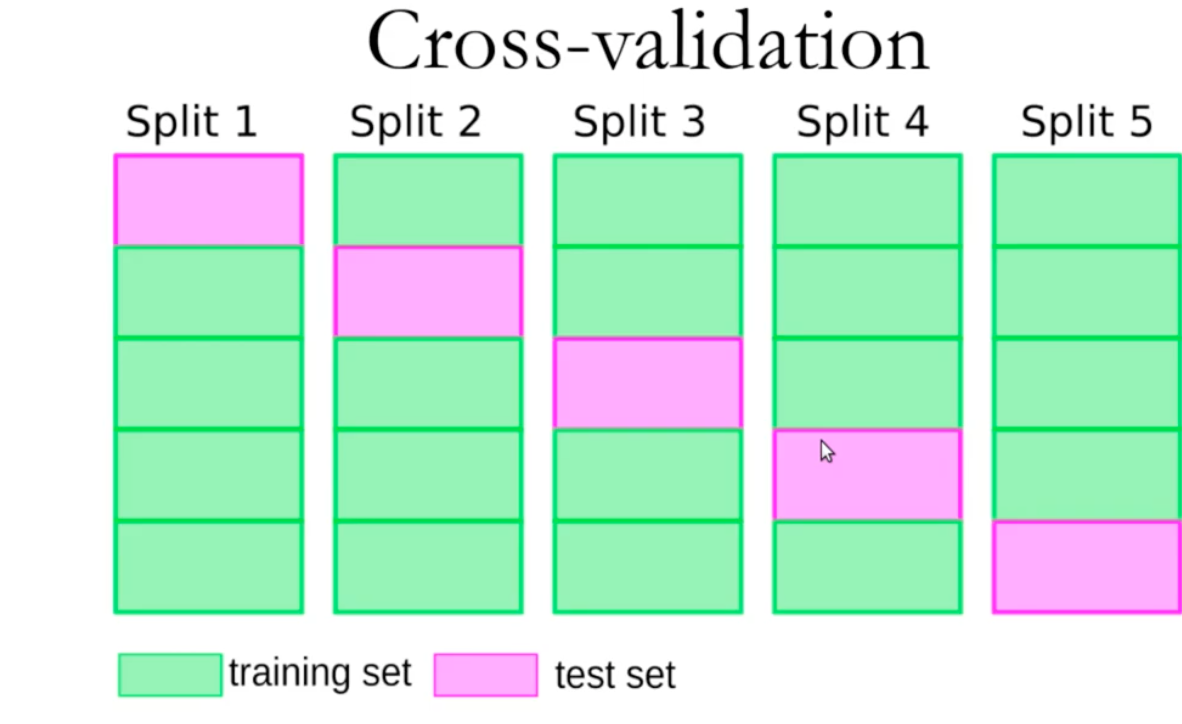

# Grid search with cross-validation

In [38]:
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X,y)
cross_val_scores = []
neighbors = np.arange(1,15,2)
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,X_train,y_train,cv=10)
    
    cross_val_scores.append(np.mean(score))
print("best cross-validation score: {:.3f}".format(np.max(cross_val_scores)))
best_n_neighbors = neighbors[np.argmax(cross_val_scores)]
print("best_n_neighbors:", best_n_neighbors)

knn = KNeighborsClassifier(n_neighbors= best_n_neighbors)
knn.fit(X_train, y_train)
print("test-set score: {:.3f}".format(knn.score(X_test, y_test)))

best cross-validation score: 0.934
best_n_neighbors: 5
test-set score: 0.930


# GridSearchCV

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
X_train,X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [41]:
param_grid = {'n_neighbors':np.arange(1,15,2)}
grid = GridSearchCV(KNeighborsClassifier(),param_grid=param_grid,
                   cv=10, return_train_score=True)

In [42]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [43]:
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters {}".format(grid.best_params_))
print("test-set score {:.3f}".format(grid.score(X_test,y_test)))

best mean cross-validation score: 0.932
best parameters {'n_neighbors': 7}
test-set score 0.944
